# Problem Statement
### About Company
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

### Problem
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

# Variable Description

### Variable      -      Description

Loan_ID           -  Unique Loan ID

Gender             - Male/ Female

Married           -  Applicant married (Y/N)

Dependents         - Number of dependents

Education           - Applicant Education (Graduate/ Under Graduate)

Self_Employed    -   Self employed (Y/N)

ApplicantIncome   -  Applicant income

CoapplicantIncome -  Coapplicant income

LoanAmount        -  Loan amount in thousands

Loan_Amount_Term -   Term of loan in months

Credit_History  -    Credit history meets guidelines

Property_Area     -  Urban/ Semi Urban/ Rural

Loan_Status      -   Loan approved (Y/N)

 

In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Finding the type of delimiter in our data

The following code can be used to find the delimitr of a file. But, pd.read_csv automatically finds the delimiter and read the data accordingly by using the same inbuilt function Sniffer.

In [4]:
import csv

sniffer = csv.Sniffer()
dialect = sniffer.sniff('../Dataset/train.txt')
print(dialect.delimiter)

t


# Import Datasets

In [5]:
train = pd.read_csv('../Dataset/train.txt')

In [6]:
test = pd.read_csv("../Dataset/test.txt")

# Exploratory Data Analysis

## Steps of Exploratory Data Analysis

1. Variable Identification
2. Univariate Analysis
3. Bivariate Analysis
4. Missing Values Treatment
5. Outlier Treatment
6. Variable Transformation
7. Variable Creation


# Step 1: Variable Identification

1. First identify target and feature variables.
2. Second, Categorical and Continuous
3. Third, Strings and Numerical

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [8]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
train.Education.describe()

count          614
unique           2
top       Graduate
freq           480
Name: Education, dtype: object

In [12]:
train.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [13]:
train.LoanAmount.nunique()

203

In [14]:
train.Credit_History.unique()

array([ 1.,  0., nan])

In [15]:
train.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [16]:
train.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

# Step 1 Result: Variable Identification

1.  Loan ID
2.  Gender- Categorical Character (Male, Female) - Encoding Required
3.  Married- Categorical Character (Yes, No) - Encoding Required
4.  Dependents - Categorical Character (0,1,2,3+) - Encoding required
5.  Education- Categorical Character (Graduate, Not Graduate) - Encoding Required
6.  Self_Employed- Categorical Character (Yes/No) - Encoding Required
7.  ApplicantIncome - Numerical Continuous
8.  CoapplicantIncome - Numerical Continuous
9.  LoanAmount - Numerical Continuous
10. Loan_Amount_Term - Categorical Numeric, 10 Unique values - Encoding Required
11. Credit_History - Categorical Numeric (1,0, nan) - Encoding Required
12. Property_Area - Categorical Character (Urban, SemiUrban, Rural) - Encoding Required
13. Loan_Status - Categorical Character (Y,N) - Encoding Required


# Step 2: Univariate Analysis

### For continuous variables:
1. Mean, Median, Mode, Min, Max, S.D. etc
2. Histogram
3. Boxplots
4.

### For categorical variables
1. Frequency analysis
2. Bar graph


In [17]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [18]:
train.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [19]:
train.groupby(by = 'Gender', axis = 0).count()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,,,,,,,,,,,,
Female,112,111,109,112,104,112,112,109,109,101,112,112
Male,489,487,477,489,465,489,489,470,478,451,489,489


In [20]:
train.Loan_ID.describe()

count          614
unique         614
top       LP002448
freq             1
Name: Loan_ID, dtype: object

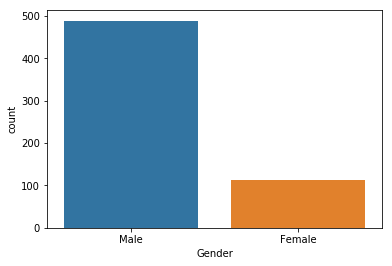

In [28]:
sns.countplot(x = 'Gender', data =train)

In [29]:
train.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

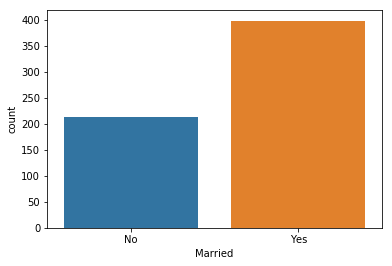

In [30]:
sns.countplot(x = 'Married', data = train)

In [32]:
train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

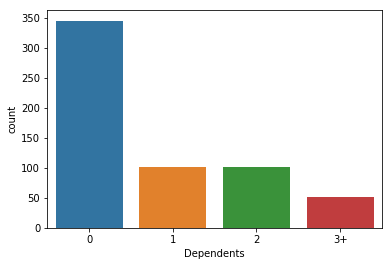

In [34]:
sns.countplot(x= 'Dependents', data = train)

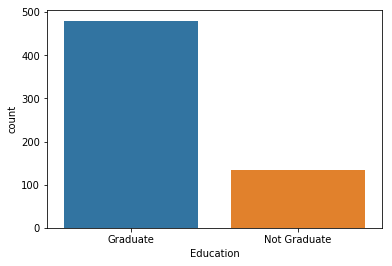

In [35]:
sns.countplot(x = 'Education', data = train)

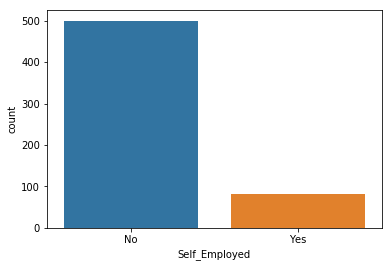

In [36]:
sns.countplot(x = 'Self_Employed', data = train)

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


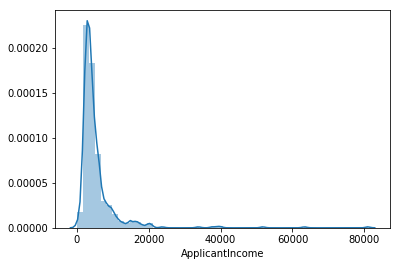

In [39]:
sns.distplot(train.ApplicantIncome)

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


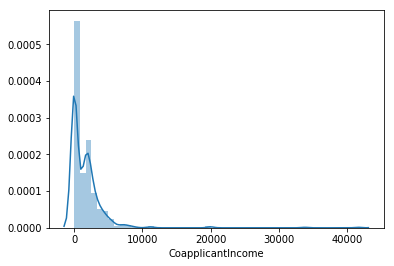

In [40]:
sns.distplot(train.CoapplicantIncome)

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


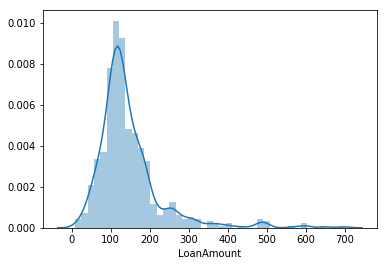

In [51]:
sns.distplot(train.LoanAmount.dropna())

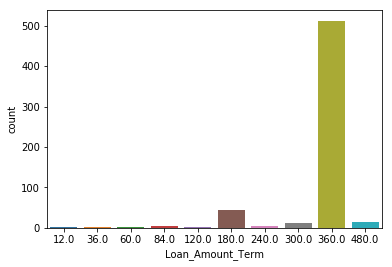

In [52]:
sns.countplot(train.Loan_Amount_Term)

In [54]:
train.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [56]:
train.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

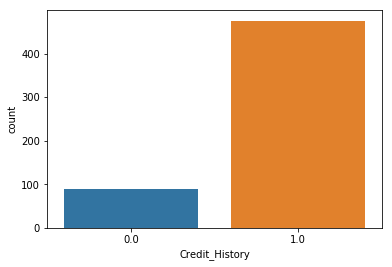

In [57]:
sns.countplot(train.Credit_History)

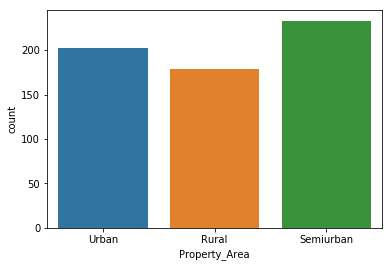

In [61]:
sns.countplot(train.Property_Area)

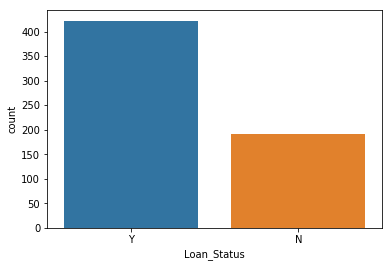

In [62]:
sns.countplot(train.Loan_Status)

# Result of Step 2: Univariate Analysis

1. There are more males than female applicants.
2. 